<a href="https://colab.research.google.com/github/VladousSparrowous/OpenML/blob/main/MLforYandex_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [5]:
# @title работа с данными

data = pd.read_csv('/content/sample_data/organisations.csv')
features = pd.read_csv('/content/sample_data/features.csv')
rubrics = pd.read_csv('/content/sample_data/rubrics.csv')

In [6]:
print(data.head())

                 org_id city  average_bill    rating   rubrics_id  \
0  15903868628669802651  msk        1500.0  4.270968  30776 30774   
1  16076540698036998306  msk         500.0  4.375000        30771   
2   8129364761615040323  msk         500.0  4.000000        31495   
3  15262729117594253452  msk         500.0  4.538813  30776 30770   
4  13418544315327784420  msk         500.0  4.409091        31495   

                                         features_id  
0  3501685156 3501779478 20422 3502045016 3502045...  
1  1509 1082283206 273469383 10462 11617 35017794...  
2  10462 11177 11617 11629 1416 1018 11704 11867 ...  
3  3501618484 2020795524 11629 11617 1018 11704 2...  
4  11617 10462 11177 1416 11867 3501744275 20282 ...  


In [7]:
print(features.head())
print(rubrics.head())
dict_of_features = {features.loc[i, "feature_id"]: features.loc[i, "feature_name"] for i in features.index}
dict_of_rubrics = {rubrics.loc[i, "rubric_id"]: rubrics.loc[i, "rubric_name"] for i in rubrics.index}
print(dict_of_features)
print(dict_of_rubrics)

   feature_id                           feature_name
0           1  prepress_and_post_printing_processing
1          40                               products
2          54                        printing_method
3          77                                   fuel
4          79                                   shop
   rubric_id        rubric_name
0      30519  Булочная, пекарня
1      30770           Бар, паб
2      30771    Быстрое питание
3      30774               Кафе
4      30775           Пиццерия
{np.int64(1): 'prepress_and_post_printing_processing', np.int64(40): 'products', np.int64(54): 'printing_method', np.int64(77): 'fuel', np.int64(79): 'shop', np.int64(82): 'last_minute_deals_only', np.int64(104): 'tour_type', np.int64(110): 'audio_guide', np.int64(111): 'cargo_transportation', np.int64(113): 'manufacturing', np.int64(114): 'installation', np.int64(115): 'repairs', np.int64(116): 'production', np.int64(117): 'sale', np.int64(133): 'music_genre', np.int64(135): 'electron

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


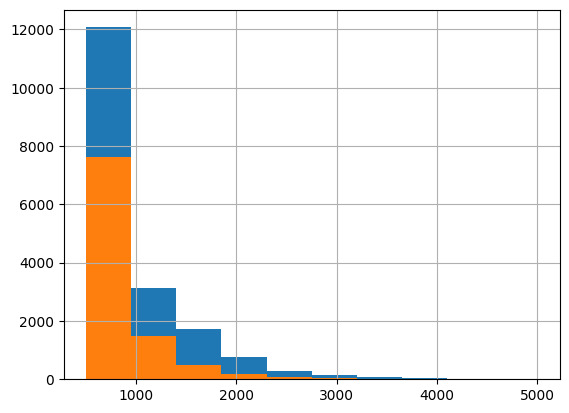

In [8]:
data_msk = data.where(data["city"] == "msk").dropna()
data_spb = data.where(data["city"] == "spb").dropna()
print(data_msk["average_bill"].where(data["average_bill"] <= 5000).hist())
print(data_spb["average_bill"].where(data["average_bill"] <= 5000).hist())

In [9]:
print(data["city"].size)
D = data.where(data['average_bill'] <= 2500)
D = D.dropna(subset=["average_bill"])
D = D[data["rubrics_id"].str.contains("30774")]
print(D)
A = D[["city", "average_bill"]]
print(A)
D1 = A.groupby(["city"]).mean()
print(D1)

print(D1["average_bill"].iloc[0] - D1["average_bill"].iloc[1])

68339
             org_id city  average_bill    rating         rubrics_id  \
0      1.590387e+19  msk        1500.0  4.270968        30776 30774   
12     1.521261e+19  spb         500.0  4.500000  30777 30774 31350   
16     1.712342e+19  spb         500.0  4.220000  30776 30774 30777   
20     1.994627e+18  msk         500.0  4.101695        30519 30774   
21     1.076755e+19  msk         500.0  4.139241        30774 30771   
...             ...  ...           ...       ...                ...   
68319  1.099247e+19  msk        1000.0  4.250704  30774 30776 30770   
68320  1.266068e+19  msk        1000.0  4.521978        30776 30774   
68321  1.821983e+19  msk        1000.0  3.873418        30776 30774   
68323  5.768868e+18  msk        1000.0  4.326633  30776 30774 30775   
68331  1.249972e+19  msk        1500.0  4.554577  30770 30776 30774   

                                             features_id  
0      3501685156 3501779478 20422 3502045016 3502045...  
12     10462 11177 1162

<ipython-input-9-c282dd0739fd>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  D = D[data["rubrics_id"].str.contains("30774")]


In [10]:
# @title очистка данных

clean_data = data.where(data["average_bill"] <= 2500)
clean_data = clean_data.dropna(subset=["average_bill"])
#print(clean_data)
clean_data_train, clean_data_test = train_test_split(
    clean_data, stratify=clean_data["average_bill"], test_size=0.33, random_state=42)
print(clean_data_train.drop(["average_bill"], axis=1))
print(clean_data_train["average_bill"])

             org_id city    rating   rubrics_id  \
45769  3.276961e+18  msk  4.500000        30770   
39061  8.452997e+18  msk  4.442623  30774 30776   
59281  1.424041e+19  spb  4.018868  30776 30774   
51225  1.511407e+19  msk  4.364742  31401 30776   
29587  2.730337e+18  msk  4.698718        30770   
...             ...  ...       ...          ...   
64667  1.564132e+19  msk  4.510753        30771   
47309  2.049892e+18  msk  4.333333        30771   
26208  1.222407e+19  msk  5.000000        30775   
48599  1.658146e+19  msk  4.692308  31495 30774   
17863  1.140961e+19  msk  3.222222        30774   

                                             features_id  
45769            11704 20422 1018 11177 1416 11867 10462  
39061  1415 3501481355 1416 11629 10462 1524 20422 11...  
59281  3502045032 11741 3502045016 10462 11704 350177...  
51225  3501513153 3501779478 3491142672 273469383 350...  
29587  21247 10896 3491142672 11629 3501481353 350148...  
...                              

In [11]:
# @title среднее и мода

from sklearn.utils.validation import validate_data, check_is_fitted
from sklearn.base import RegressorMixin, BaseEstimator
from sklearn.metrics import root_mean_squared_error, balanced_accuracy_score
from scipy.stats import mode


class MeanRegressor(RegressorMixin):
    def __init__(self, param=1):
        self.param = param

    # Predicts the mean of y_train
    def fit(self, X=None, y=None):
        '''
        Parameters
        ----------
        X : array like, shape = (n_samples, n_features)
        Training data features
        y : array like, shape = (_samples,)
        Training data targets
        '''
        # YOUR CODE HERE
        self.param = y.mean()
        return self

    def predict(self, X=None):
        '''
        Parameters
        ----------
        X : array like, shape = (n_samples, n_features)
        Data to predict
        '''
        # YOUR CODE HERE
        return np.full(X.shape[0], self.param)


from sklearn.base import ClassifierMixin


class MostFrequentClassifier(ClassifierMixin):
    def __init__(self, param=1):
        self.param = param

    # Predicts the rounded (just in case) median of y_train
    def fit(self, X=None, y=None):
        '''
        Parameters
        ----------
        X : array like, shape = (n_samples, n_features)
        Training data features
        y : array like, shape = (_samples,)
        Training data targets
        '''
        # YOUR CODE HERE
        self.param = mode(y)[0]
        return self

    def predict(self, X=None):
        '''
        Parameters
        ----------
        X : array like, shape = (n_samples, n_features)
        Data to predict
        '''
        # YOUR CODE HERE
        print(self.param)
        return np.full(X.shape[0], self.param)

In [12]:
# @title обучение

reg = MeanRegressor()
reg.fit(y=clean_data_train['average_bill'])


clf = MostFrequentClassifier()
clf.fit(y=clean_data_train['average_bill'])

In [13]:
# @title предсказание

Answer_reg = reg.predict(clean_data_test)
print(Answer_reg)

Answer_clf = clf.predict(clean_data_test)
print(Answer_clf)


[752.10162092 752.10162092 752.10162092 ... 752.10162092 752.10162092
 752.10162092]
500.0
[500. 500. 500. ... 500. 500. 500.]


In [14]:
# @title метрики

m1_reg = root_mean_squared_error(clean_data_test['average_bill'], Answer_reg)
print(m1_reg)
m1_clf = root_mean_squared_error(clean_data_test['average_bill'], Answer_clf)
m2_clf = balanced_accuracy_score(clean_data_test['average_bill'], Answer_clf)
print(m1_clf, m2_clf)

448.7143889551622
514.7517402382093 0.2


In [15]:
# @title регрессор
from sklearn.base import RegressorMixin


class CityMeanRegressor(RegressorMixin):

    def __init__(self):
        self.mean_msk = -1
        self.mean_spb = -1

    def fit(self, X=None, y=None):
        X = X['city']
        msk_Series = list()
        spb_Series = list()
        N_msk = 0
        N_spb = 0
        for i in X:
          if i == "msk":
            msk_Series.append(1)
            N_msk += 1
            spb_Series.append(0)
          else:
            N_spb += 1
            msk_Series.append(0)
            spb_Series.append(1)
        msk_Series = np.array(msk_Series)
        spb_Series = np.array(spb_Series)
        self.mean_msk = (msk_Series@y) / N_msk
        self.mean_spb = (spb_Series@y) / N_spb
        return self

    def predict(self, X=None):
        X = X['city']
        answer = list()
        for i in X:
            if i == "msk":
              answer.append(self.mean_msk)
            else:
              answer.append(self.mean_spb)
        return np.array(answer)

reg = CityMeanRegressor()
reg.fit(X=clean_data_train, y=clean_data_train['average_bill'])
Answer_reg = reg.predict(clean_data_test)
print(Answer_reg)
m_reg_city = root_mean_squared_error(clean_data_test['average_bill'], Answer_reg)
print(m_reg_city)

[677.71044658 792.61119082 792.61119082 ... 792.61119082 792.61119082
 677.71044658]
445.1063281403263


In [16]:
# @title значимые классы типов заведений

data_rubric = data.groupby(["rubrics_id"]).count()
data_rubric = data_rubric["org_id"]
print(data_rubric)
data_rubric = data_rubric[data_rubric >= 100]
print(data_rubric)

rubrics_id
30519                           2733
30519 30770                        3
30519 30770 30777                  1
30519 30771                      115
30519 30771 30774                 11
                                ... 
3501750896 31401 30770 30774       1
3501750896 31495                  93
3501750896 31495 30774             4
3501750896 31495 30774 30519       2
3501750896 31495 3108292683        1
Name: org_id, Length: 838, dtype: int64
rubrics_id
30519               2733
30519 30771          115
30519 30774          292
30519 31350          154
30770               3051
                    ... 
31495               4896
31495 30519          131
31495 30774          622
31495 3501750896     114
3501750896           289
Name: org_id, Length: 64, dtype: int64


In [17]:
# @title добавляем типы заведений в данные

from collections import Counter

clean_data_rubrics_mod = clean_data.copy()
rubric_counter = Counter(clean_data_rubrics_mod["rubrics_id"])
mod_rub = []
for rub in clean_data_rubrics_mod["rubrics_id"]:
  if rubric_counter[rub] >= 100:
    mod_rub.append(rub)
  else:
    mod_rub.append("other")
clean_data_rubrics_mod["modified_rubrics"] = mod_rub
print(clean_data_rubrics_mod)

             org_id city  average_bill    rating         rubrics_id  \
0      1.590387e+19  msk        1500.0  4.270968        30776 30774   
1      1.607654e+19  msk         500.0  4.375000              30771   
2      8.129365e+18  msk         500.0  4.000000              31495   
3      1.526273e+19  msk         500.0  4.538813        30776 30770   
4      1.341854e+19  msk         500.0  4.409091              31495   
...             ...  ...           ...       ...                ...   
68328  1.766268e+19  spb        1000.0  4.561707              30776   
68329  5.700900e+18  msk        1500.0  4.377129              31401   
68330  4.686041e+18  msk        1500.0  3.666667              30776   
68331  1.249972e+19  msk        1500.0  4.554577  30770 30776 30774   
68332  9.718017e+17  msk        2500.0  4.659884              30776   

                                             features_id modified_rubrics  
0      3501685156 3501779478 20422 3502045016 3502045...      30776 307

In [18]:
# @title новые выборки

clean_data_modified_train, clean_data_modified_test = train_test_split(
    clean_data_rubrics_mod, stratify=clean_data_rubrics_mod["average_bill"], test_size=0.33, random_state=42)
print(clean_data_modified_train.drop(["average_bill"], axis=1))
print(clean_data_modified_train["average_bill"])


             org_id city    rating   rubrics_id  \
45769  3.276961e+18  msk  4.500000        30770   
39061  8.452997e+18  msk  4.442623  30774 30776   
59281  1.424041e+19  spb  4.018868  30776 30774   
51225  1.511407e+19  msk  4.364742  31401 30776   
29587  2.730337e+18  msk  4.698718        30770   
...             ...  ...       ...          ...   
64667  1.564132e+19  msk  4.510753        30771   
47309  2.049892e+18  msk  4.333333        30771   
26208  1.222407e+19  msk  5.000000        30775   
48599  1.658146e+19  msk  4.692308  31495 30774   
17863  1.140961e+19  msk  3.222222        30774   

                                             features_id modified_rubrics  
45769            11704 20422 1018 11177 1416 11867 10462            30770  
39061  1415 3501481355 1416 11629 10462 1524 20422 11...      30774 30776  
59281  3502045032 11741 3502045016 10462 11704 350177...      30776 30774  
51225  3501513153 3501779478 3491142672 273469383 350...            other  
29587  

In [19]:
# @title классификатор с учётом типов заведений

class RubricCityMedianClassifier(ClassifierMixin):

    def __init__(self):
        self.msk = -1
        self.spb = -1

    def fit(self, X=None, y=None):
        X["average_bill"] = y
        D_msk = X[X["city"] == "msk"]
        D_spb = X[X["city"] == "spb"]

        D_msk = D_msk[["average_bill", "modified_rubrics"]]
        D_spb = D_spb[["average_bill", "modified_rubrics"]]

        D_msk = D_msk.groupby("modified_rubrics").median()
        D_spb = D_spb.groupby("modified_rubrics").median()

        self.msk = D_msk
        self.spb = D_spb
        return self

    def predict(self, X=None):
        Answer = []
        for i in X.index:
            if X.loc[i, "city"] == "msk":
                Answer.append(self.msk.loc[X.loc[i, "modified_rubrics"], "average_bill"])
            else:
                Answer.append(self.spb.loc[X.loc[i, "modified_rubrics"], "average_bill"])
        return np.array(Answer)

In [20]:
clf = RubricCityMedianClassifier()
clf.fit(X=clean_data_modified_train.drop(["average_bill"], axis=1), y=clean_data_modified_train["average_bill"])
clf_answer = clf.predict(X=clean_data_modified_test)
print(clf_answer)
m1_clf_mod = root_mean_squared_error(clean_data_modified_test['average_bill'], clf_answer)
m2_clf_mod = balanced_accuracy_score(clean_data_modified_test['average_bill'], clf_answer)
print(m1_clf_mod, m2_clf_mod)

[ 500.  500.  500. ... 1500.  500.  500.]
391.83678731393195 0.3073310992848548


In [21]:
# @title переобученный классификатор

class RubricFeaturesCityMedianClassifier(ClassifierMixin):

    def __init__(self):
        self.feat = -1
        self.med = -1

    def fit(self, X=None, y=None):

        X["average_bill"] = y
        self.med = X["average_bill"].median()
        X = X[["average_bill", "modified_features"]]
        self.feat = X.groupby("modified_features").median()

        return self

    def predict(self, X=None):
        Answer = []
        for i in X.index:
            if X.loc[i, "modified_features"] in self.feat.index:
                 Answer.append(int(self.feat.loc[X.loc[i, "modified_features"], "average_bill"]))
            else:
                 Answer.append(int(self.med))

        return np.array(Answer)

In [22]:
r_f = clean_data.copy()
r_f["modified_features"] = r_f["rubrics_id"] + " q " + r_f["features_id"]
print(r_f)
clean_data_train, clean_data_test = train_test_split(
    r_f, stratify=r_f["average_bill"], test_size=0.33, random_state=42)

             org_id city  average_bill    rating         rubrics_id  \
0      1.590387e+19  msk        1500.0  4.270968        30776 30774   
1      1.607654e+19  msk         500.0  4.375000              30771   
2      8.129365e+18  msk         500.0  4.000000              31495   
3      1.526273e+19  msk         500.0  4.538813        30776 30770   
4      1.341854e+19  msk         500.0  4.409091              31495   
...             ...  ...           ...       ...                ...   
68328  1.766268e+19  spb        1000.0  4.561707              30776   
68329  5.700900e+18  msk        1500.0  4.377129              31401   
68330  4.686041e+18  msk        1500.0  3.666667              30776   
68331  1.249972e+19  msk        1500.0  4.554577  30770 30776 30774   
68332  9.718017e+17  msk        2500.0  4.659884              30776   

                                             features_id  \
0      3501685156 3501779478 20422 3502045016 3502045...   
1      1509 1082283206 2734

In [23]:
clf = RubricFeaturesCityMedianClassifier()
clf.fit(X=clean_data_train.drop(["average_bill"], axis=1), y=clean_data_train["average_bill"])

clf_answer = clf.predict(X=clean_data_test)
print(clf_answer)

clf_answer_t = clf.predict(X=clean_data_train)
print(clf_answer)

m1_clf_mod = root_mean_squared_error(clean_data_train['average_bill'], clf_answer_t)
m2_clf_mod = balanced_accuracy_score(clean_data_train['average_bill'], clf_answer_t)
print(m1_clf_mod, m2_clf_mod)

m1_clf_mod = root_mean_squared_error(clean_data_test['average_bill'], clf_answer)
m2_clf_mod = balanced_accuracy_score(clean_data_test['average_bill'], clf_answer)
print(m1_clf_mod, m2_clf_mod)

[500 500 500 ... 500 500 500]
[500 500 500 ... 500 500 500]
32.4162067388783 0.9931928777769354
513.9898108867789 0.2010249213051401


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [24]:
answer = pd.Series(clf_answer, index=clean_data_test.index)
answer.to_csv('/content/sample_data/I_contest.csv')

In [25]:
# @title разреженная матрица тренировачных данных(onehot encoding)

clean_data_train, clean_data_test = train_test_split(
    clean_data, stratify=clean_data["average_bill"], test_size=0.33, random_state=42)

total_train_dict = dict()
count_cols = 2 # city and rating
count_rows = 0

train_rows = list()
train_cols = list()
train_data_rc = list()

for i in clean_data_train.index:

  string_rub = clean_data_train.loc[i, "rubrics_id"].split()
  string_feat = clean_data_train.loc[i, "features_id"].split()

  if clean_data_train.loc[i, "city"] == 'msk':
    train_rows.append(count_rows)
    train_cols.append(0)
    train_data_rc.append(1)

  train_rows.append(count_rows)
  train_cols.append(1)
  train_data_rc.append(clean_data_train.loc[i, "rating"])

  for j in string_rub:
    train_rows.append(count_rows)

    if total_train_dict.get(j, -1) == -1:
      total_train_dict[j] = count_cols
      count_cols += 1

    train_cols.append(total_train_dict[j])
    train_data_rc.append(1)

  for j in string_feat:
    train_rows.append(count_rows)

    if total_train_dict.get(j, -1) == -1:
      total_train_dict[j] = count_cols
      count_cols += 1

    train_cols.append(total_train_dict[j])
    train_data_rc.append(1)

  count_rows += 1

count_cols += 1 # добавление feature_other

In [26]:
# @title разреженная матрица тестовых данных

count_rows_test = 0

test_rows = list()
test_cols = list()
test_data_rc = list()

for i in clean_data_test.index:

  string_rub = clean_data_test.loc[i, "rubrics_id"].split()
  string_feat = clean_data_test.loc[i, "features_id"].split()

  if clean_data_test.loc[i, "city"] == 'msk':
    test_rows.append(count_rows_test)
    test_cols.append(0)
    test_data_rc.append(1)

  test_rows.append(count_rows_test)
  test_cols.append(1)
  test_data_rc.append(clean_data_test.loc[i, "rating"])

  for j in string_rub:
    test_rows.append(count_rows_test)

    if total_train_dict.get(j, -1) == -1:
      test_cols.append(count_cols)
    else:
      test_cols.append(total_train_dict[j])

    test_data_rc.append(1)

  for j in string_feat:
    test_rows.append(count_rows_test)

    if total_train_dict.get(j, -1) == -1:
      test_cols.append(count_cols)
    else:
      test_cols.append(total_train_dict[j])

    test_data_rc.append(1)

  count_rows_test += 1

In [27]:
# @title CSR format

from scipy.sparse import csr_matrix

sparse_data_train = csr_matrix((train_data_rc, (train_rows, train_cols)), shape=(count_rows, count_cols + 1))

sparse_data_test = csr_matrix((test_data_rc, (test_rows, test_cols)), shape=(count_rows_test, count_cols + 1))

In [28]:
# @title CatBoost
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.2 MB/s eta 0:00:00


In [29]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier()
clf.fit(sparse_data_train, clean_data_train['average_bill'])

Learning rate set to 0.092536
0:	learn: 1.4325696	total: 433ms	remaining: 7m 12s
1:	learn: 1.3138093	total: 695ms	remaining: 5m 46s
2:	learn: 1.2250558	total: 1.02s	remaining: 5m 40s
3:	learn: 1.1539452	total: 1.23s	remaining: 5m 6s
4:	learn: 1.0941024	total: 1.43s	remaining: 4m 44s
5:	learn: 1.0437642	total: 1.68s	remaining: 4m 38s
6:	learn: 1.0038510	total: 2.08s	remaining: 4m 54s
7:	learn: 0.9694501	total: 2.38s	remaining: 4m 55s
8:	learn: 0.9382608	total: 2.69s	remaining: 4m 56s
9:	learn: 0.9130575	total: 2.94s	remaining: 4m 51s
10:	learn: 0.8897753	total: 3.26s	remaining: 4m 52s
11:	learn: 0.8714138	total: 3.79s	remaining: 5m 11s
12:	learn: 0.8539037	total: 4.5s	remaining: 5m 42s
13:	learn: 0.8372532	total: 5.07s	remaining: 5m 57s
14:	learn: 0.8211920	total: 5.65s	remaining: 6m 11s
15:	learn: 0.8084090	total: 6.26s	remaining: 6m 25s
16:	learn: 0.7975785	total: 6.67s	remaining: 6m 25s
17:	learn: 0.7866897	total: 7.02s	remaining: 6m 22s
18:	learn: 0.7784122	total: 7.41s	remaining: 6

In [30]:
answer = clf.predict(sparse_data_test)
print(answer)
print(balanced_accuracy_score(clean_data_test["average_bill"], answer))

[[ 500.]
 [ 500.]
 [ 500.]
 ...
 [1500.]
 [ 500.]
 [ 500.]]
0.3623990995353493


In [31]:
s = 1
for i in range(2, 17):
  s += i * 3 * 2**(2 * i - 3)
print(s)
ost = 0
coef = []
for i in range(1, 17):
  ost = s % (2**(i-1))
  coef.append((s % (2**i) - ost) // (2**(i-1)))
print(coef)

33643910485
[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>